In [1]:
import typing
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as ps

from pathlib import Path
from datapaths import *

pd.set_option('display.max_rows', 2)

## Total window flipons

In [2]:
def get_total_window_flipons(path: str, group_name: str, value_name='#'):
    result = (
        pd.read_table(path, index_col=0, thousands=r',')
        .rename_axis('Flipons', axis=0)
    )
    if value_name == '%':
        result = result.div(result.sum(axis=1), axis=0) * 100
    result = result.reset_index().melt(id_vars=['Flipons'], var_name='Window', value_name=value_name)
    result['Group'] = group_name
    result['Flipons'] = result['Flipons'].astype(str).str.upper()

    return result


In [17]:
def plot_total_window_flipons(input_df: pd.DataFrame, fig_title: str, img_title: str, height=400, width=1700):
    fig = px.bar(
        input_df,
        x="Window",
        y="#",
        text_auto=True,
        color="Flipons",
        color_discrete_map=COLORS,
        barmode='group',
        category_orders={'Flipons': ['G4', 'Z-DNA', 'SIDD', 'H-DNA']},
    )

    tickvals = sorted(input_df['Window'].astype(int).unique())
    ticktext = [f"TSS<b>{x*100:+}bp</b>" for x in tickvals]
    fig.update_xaxes(
        showgrid=False,
        title=None,
        tickmode='array',
        tickvals = tickvals,
        ticktext = ticktext,
    )

    fig.update_yaxes(title=None, showgrid=True)

    fig.update_traces(texttemplate='%{y:,d}', textposition='inside')

    fig.update_layout(
        title=f"<span style='font-size: 16px;'>{fig_title}</span>",
        title_x=0.005,
        title_y=0.99,
        height=height,
        width=width,
        template="simple_white",
        font=dict(size=14),
        margin=dict(l=25, r=5, b=5, t=5),
        legend=dict(
            font_size=14,
            title_text="",
            orientation="h",
            yanchor="bottom",
            y=1,
            xanchor="right",
            x=1,
        ),
    )

    fig.write_image(D_IMG/img_title, scale=2)
    fig.show(renderer='png')


In [18]:
total_window_flipons_all = get_total_window_flipons(D_TABLES / "total_window_flipons_all.tsv", 'All flipons', '#')
total_window_flipons_mirna = get_total_window_flipons(D_TABLES / "total_window_flipons_mirna.tsv", 'Flipons & miR', '#')

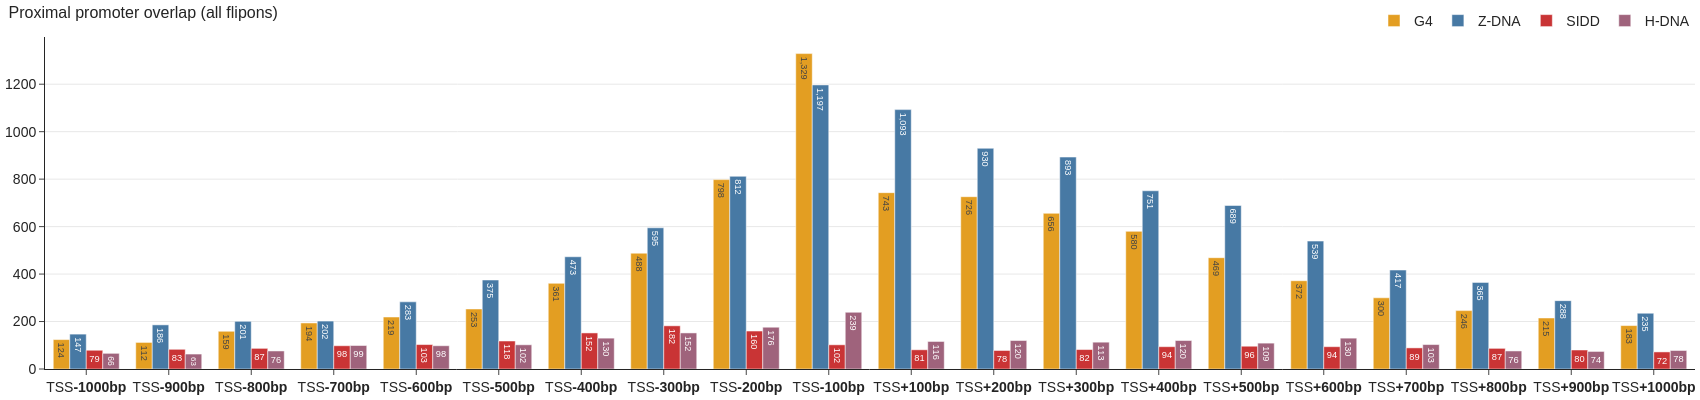

In [19]:
plot_total_window_flipons(total_window_flipons_all, 'Proximal promoter overlap (all flipons)', 'Figure.3C.png')

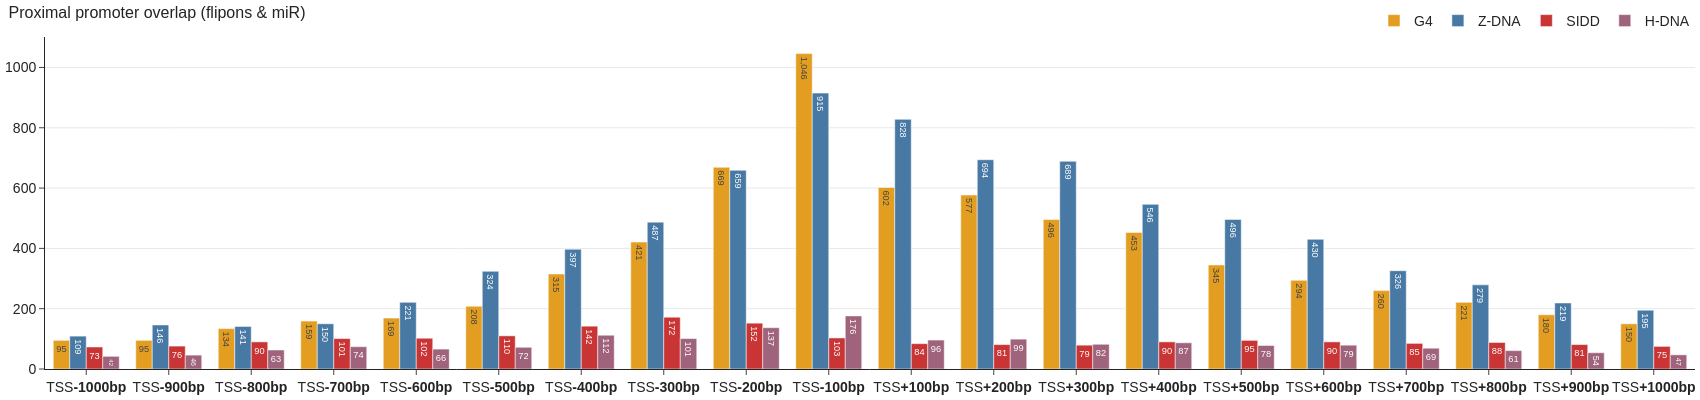

In [20]:
plot_total_window_flipons(total_window_flipons_mirna, 'Proximal promoter overlap (flipons & miR)', 'Figure.3D.png')

## Flipon colocalization

In [12]:
def get_flipon_colocalization(path: str, group_name: str):
    result = (
        pd.read_table(path, index_col=0, thousands=r',')
        .rename_axis('Flipons', axis=0)
        .reset_index()
        .melt(id_vars=['Flipons'], var_name='Window', value_name='#')
        .assign(Group = group_name, Flipons = lambda x: x.Flipons.astype(str))
    )

    return result


In [21]:
def plot_flipon_colocalization(input_df: pd.DataFrame, range: tuple, fig_title: str, img_title: str, height=400, width=1700):
    fig = px.bar(
        input_df,
        x="Window",
        y="#",
        text_auto=True,
        color="Flipons",
    )

    tickvals = sorted(input_df['Window'].astype(int).unique())
    ticktext = [f"TSS<b>{x*100:+}bp</b>" for x in tickvals]
    fig.update_xaxes(
        showgrid=False,
        title=None,
        tickmode='array',
        tickvals = tickvals,
        ticktext = ticktext,
    )

    fig.update_yaxes(title=None, showgrid=True, range=range)

    fig.update_traces(texttemplate='%{y:,d}', textposition='inside')

    fig.update_layout(
        title=f"<span style='font-size: 16px;'>{fig_title}</span>",
        title_x=0.005,
        title_y=0.99,
        height=height,
        width=width,
        template="simple_white",
        margin=dict(l=25, r=5, b=5, t=5),
        legend=dict(
            title_text="",
            orientation="h",
            yanchor="bottom",
            y=1,
            xanchor="right",
            x=.995,
        ),
    )

    fig.write_image(D_IMG/img_title, scale=2)
    fig.show(renderer='png')


In [14]:
flipon_colocalization_all = get_flipon_colocalization(D_TABLES / "flipon_colocalization_all.tsv", "All flipons")
flipon_colocalization_mirna = get_flipon_colocalization(D_TABLES / "flipon_colocalization_mirna.tsv", "Flipons & miR")
flipon_colocalization_mirna


,Flipons,Window,#,Group
0,0,-10,14830,Flipons & miR
...,...,...,...,...
99,4,10,0,Flipons & miR


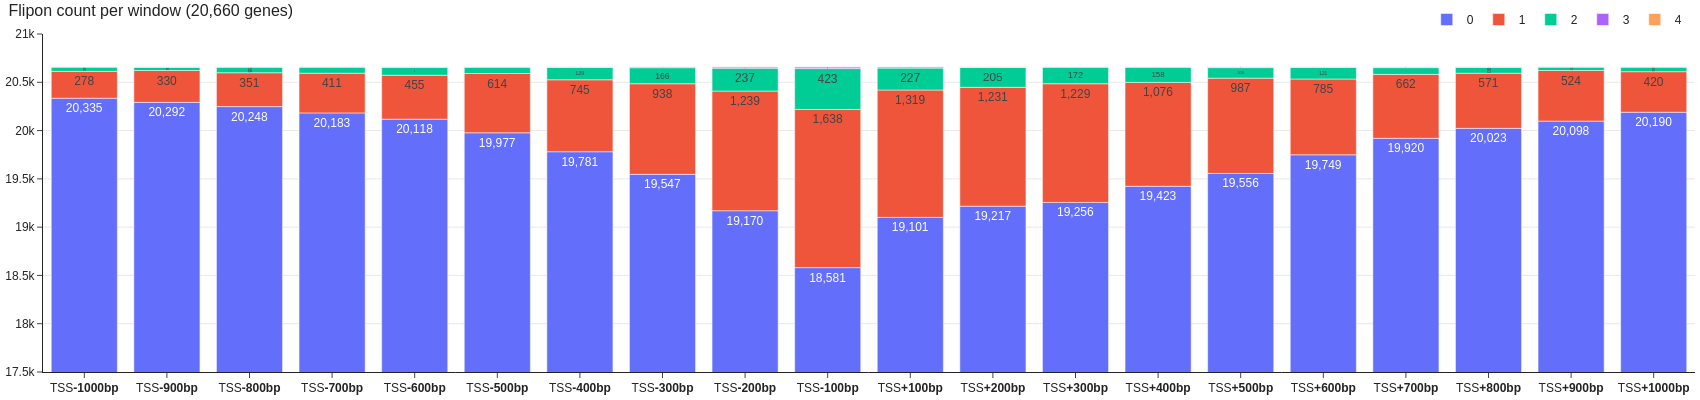

In [22]:
plot_flipon_colocalization(flipon_colocalization_all, (17500,21000), 'Flipon count per window (20,660 genes)', 'Figure.3A.png')

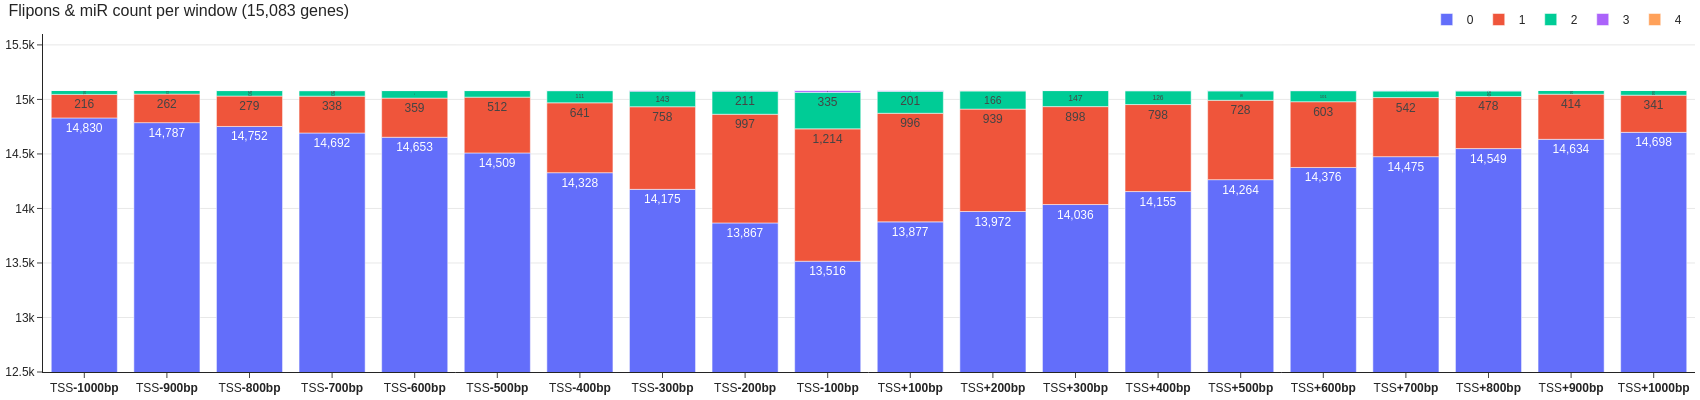

In [23]:
plot_flipon_colocalization(flipon_colocalization_mirna, (12500,15600), 'Flipons & miR count per window (15,083 genes)', 'Figure.3B.png')